# 基本的数学操作

python用于数学建模最大的一点好处就是两个非常高端的包numpy和scipy。

Numpy主要的功能就是他提供了numpy array这个对象，它可以让我们想matlab，IDL那种专门的数学编程工具一样操作矩阵类型的数据。
Scipy则是一个数值计算的工具包，它提供了基本的线性代数、微积分、微分方程求解、优化、规化等等“教科书”级别的数学操作。
这些包让python具有了和matlab，IDL等专用的科学计算工具一样的能力。但是python和matlab等专用的科学编程语言不同，
python是通用语言，因此他在其他非科学计算领域有非常多的包。有些科学问题你会发现
他也需要和其他的功能结合，因此python做科学计算是个很好的选择。

**这一部分你们将学到：**
 1. calculate derivative 计算微分
 2. calculate gradient 计算梯度
 2. integrations 积分
 3. solving linear equations 解线性方程
 4. soling non-linear equations 解非线性方程

## 首先要导入各种包

这里可以看倒，比如`from scipy import optimize`，这个是scipy的一个子包。import之后就可以用`optimize`
这个名字了。

In [1]:

import matplotlib.pyplot as plt
import sympy
from sympy import Symbol, symbols
from scipy.misc import derivative
import numpy as np
from scipy import integrate
from scipy import optimize
import math
print("--------")

c:\Users\zheng\anaconda3\envs\experiment\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\zheng\anaconda3\envs\experiment\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\zheng\anaconda3\envs\experiment\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


--------


# symbolic  Differentiation 符号微分

符号微分的意思，就是不是数值微分，而实像我们微积分课上学的，用基本函数求导配合各种规则来求导数。这个基本上，
没鸟用。一般实际应用中很少有什么函数可以非常完美的写成符号函数，并且还能求导的。我们解决实际问题还是数值的方法为主。

下面这个例子，用了sympy这个符号计算的库来实现符号积分。首先你定义符号，x就不是一个数值变量，而是一个符号，他相关的运算
都是被重载了的，所以y也是个符号。

总之，符号运算很好玩，但是没太多实际用途。

In [33]:
x = Symbol('x')
y = x**2 + 1
yprime = y.diff(x)
print(yprime)
y.diff(x, 2)



2*x


2

## partial derivitives 偏微分

符号还可以来做偏微分

$f(x,y)=x^2y$

In [3]:
x, y = symbols('x y')
f = x**2*y
dfdx = f.diff(x)
dfdy = f.diff(y)
print(dfdx)
print(dfdy)


2*x*y
x**2


## numerical Differentiation 数值微分

数值微分是利用数值的方法计算微分的，就是微分的定义$$f'=\lim_{x\to 0}\frac{f(a+h)-f(a)}{h}$$，这个原则上可以对
任何的函数积分。他求出来的不是一个函数，而实原来函数在某一个自变量上的导数数值。

In [36]:

# 这里定义了一个简单的函数


def f(x):
    return x**3 + x**2


# 然后调用scipy的函数求导，这个dx就是前面倒数定义里面的h，越接近于零，就越接近于理想的真实的导数值，大家可以改一改这个数字试试，
# 这个函数解析的倒数你一眼就能看出来吧。
derivative(f, 1.0, dx=1e-3)


5.000000999999754

## 差分
差分和导数紧密相关，$$f(x+h)-f(x)$$，这个就是差分。不过这里的我们求差分是对一个序列做差分，
并不是一个函数，就是f[i+1]-f[1].

我们当然也可以利用差分来求导数。

In [37]:
# 简单的序列的差分
x = [1, 2, 5, 8, 5, 2, 1]
print(np.diff(x))


[ 1  3  3 -3 -3 -1]


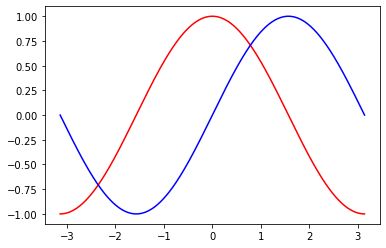

In [9]:
# 我们当然也可以利用差分来求导数。
dx = 0.001  # step size
# arange和range类似，但是它返回的是一个np array，而且间隔可以是小数，range只能是整数
X = np.arange(-math.pi, math.pi, dx)  # domain
f = np.sin(X)
fPrime = np.diff(f) / dx
# 做差分后的序列比原序列元素会少1个
plt.plot(X[0:len(fPrime)], fPrime, 'r')
plt.plot(X, f, 'b')


## 梯度
梯度就是求梯度，和差分差不多，但是是高维度的。而且塔的算法和差分也不一样。不是$f(x+h)-f(x)$，他用的叫做:
> The gradient is computed using central differences in the interior and first differences at the boundaries.
就是说对于中间的点用的是$\frac{f(x+h)-f(x-h)}{2h}$。

In [10]:
# 大家可以手算一下，理解一下这个怎么算的
np.gradient(np.array([[1, 2, 6], [3, 4, 5], [6, 7, 8]], dtype=float))



[array([[ 2. ,  2. , -1. ],
        [ 2.5,  2.5,  1. ],
        [ 3. ,  3. ,  3. ]]),
 array([[1. , 2.5, 4. ],
        [1. , 1. , 1. ],
        [1. , 1. , 1. ]])]

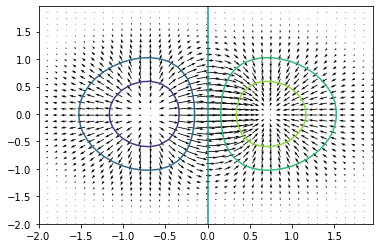

In [11]:
# 这里有个复杂一点的函数求梯度，并且把箭头话在了等高线图上。
# 关于画图后面我们再细聊。
x = np.array(np.arange(-2, 2, 0.11))
x = x.reshape(1, -1)
y = x.T
z = x * np.exp(-x ** 2 - y ** 2)
py, px = np.gradient(z)
# 生成一个xy坐标系用于画图
X, Y = np.meshgrid(x, y)
plt.contour(X, Y, z)  # 绘制等高线
plt.quiver(X, Y, px, py)  # 绘制向量图
plt.show()

## 积分

积分也分为符号积分和数值积分，符号积分多半也是没什么鸟用的，除了非常炫酷，一般是解决不了什么实际问题的。

而数值积分，其实也很简单和数值微分一样。数值积分有很多种算法，但都是算一个近似曲线下面积的方法，你自己也能写出来。
如果你认真做了作业应该已经写过一个了。

In [ ]:
# symbolic integral
# 符号积分，看看就好，这里我们用的还是sympy这个符号计算的包。

x = Symbol('x')
sympy.integrate(x**2 * sympy.exp(x) * sympy.cos(x), x)


###  数值积分numerical integral

数值积分就求一个曲线或者曲面下的面积，原理是非常简单的：

![](2021-03-29-14-29-03.png)

数值积分就很简单了，我们常使用数值积分求下面几个函数的定积分吧：

$$\int_0^1(ax^2+b)dx, a=2 b=1$$

$$\int_0^\infty\frac{1}{x^2}$$

$$\int_0^1\int_0^1\int_0^1(x^y-z)dxdydz$$

这里我们顺学一招定义函数的新方法，叫做lambda表达式，有时候函数很简单，或者是仅仅用一次就不再用了，
这个时候我们就可以用lambda表达式，很简洁的定义一个函数。


In [38]:
def f(x,a,b):
    return a*(x**2)+b


a = 2
b = 1
# 这里送到quad里面去的就是被积函数f和积分上下限，0，1。这里quad就是一种计算曲面面积的算法，注意，这里演示了一下，如果你的f不知有一个x的情况，你可以把其他的参数做成一个tuple
# 放在args里面。
I = integrate.quad(f, 0, 1, args=(a, b))
# 返回值I，里面一个是积分结果，另一个是给出来的误差
I

(1.6666666666666667, 1.8503717077085944e-14)

$$\int_1^\infty\frac{1}{x^2}$$

In [41]:

# 积分上限可以是infinity.
# 这里就用了lambda表达式，很好理解吧，lambda表达式返回的就是一个函数，这个函数的输入就是`lambda`后面的列表，
# 函数返回值就是冒号后面的表达式。
I = integrate.quad(lambda x: 1/x**2, 1, np.inf)
I


(1.0, 1.1102230246251565e-14)

In [31]:


def f(a, b, c):
    return a**b - c

# 这里也可以做3重积分，2重积分当然也可以，大家自己去scypi网站上看看。
# 这里要注意的是几番上下限，一共有6个，除了x的，后面的都是x的函数，和xy的函数，这个能理解吧。
# 因为积分区域不一定是一个立方体，所以是可以自己写函数定义的，我这里是个立方体，因为上下限函数都是返回的常数
I = integrate.tplquad(f, 0, 1, lambda x: 0, lambda x: 1,
                      lambda x, y: 0, lambda x, y: 1)
I


c:\Users\zheng\anaconda3\envs\experiment\lib\site-packages\scipy\integrate\_quadpack_py.py:879: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


(0.1931471805627689, 1.3863548171532e-08)

## 基本的线性代数

这个没啥好讲的，限薪贷书本来及很简单，你可利用numpy把python当作一个矩阵的计算器。具体的操作比如：
求逆，求特征值，求行列式，求rank，这些numpy网站上都有：https://numpy.org/doc/stable/reference/routines.linalg.html

这里就讲几个特别典型的。

In [42]:
# basic linear algebra
# https://numpy.org/doc/stable/reference/routines.linalg.html
# 矩阵求逆
a = np.array([[1., 2.], [3., 4.]])
aInv = np.linalg.inv(a)
print(aInv)
# 两个向量dot product就是矩阵相乘的结果
np.dot(a, aInv)
# 矩阵线程也可以用@表示
# a@aInv


[[-2.   1. ]
 [ 1.5 -0.5]]


array([[1.0000000e+00, 0.0000000e+00],
       [8.8817842e-16, 1.0000000e+00]])

## 解线性方程组

解线性方程组也是很简单的，和矩阵求逆差不多，就是你要把方程用系数矩阵表示出来。
写成AX=B这样的形式。

![](2021-03-29-14-30-38.png)


In [45]:
# Solve the system of equations x0 + 2 * x1 = 1 and 3 * x0 + 5 * x1 = 2:
# 这是有唯一解的情况，A矩阵的rank=b元素的个数的时候，
a = np.array([[1, 2], [1, 5]])
b = np.array([1, 2])
x = np.linalg.solve(a, b)
print(x)
np.allclose(np.dot(a, x), b)


[0.33333333 0.33333333]
[ True  True]


In [48]:
# 当A矩阵的rank笔b的元素少的时候，一般就是方程比未知数多，只能求最小二乘解。
a = np.array([[1, 2], [5, 4], [4, 3]])
b = np.array([5, 4, 6])
# 大家可以看看文档，这个lstsq方法返回的是一个list，第一个是最小二乘接，第二个是残差，在后面是A的rank，在后面是A的奇异值。
x = np.linalg.lstsq(a, b)
x

<ipython-input-48-a8dcb9237b1d>:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  x = np.linalg.lstsq(a, b)


(array([-1.20967742,  2.93548387]),
 array([7.11290323]),
 2,
 array([8.37351467, 0.94034682]))

In [ ]:
# a的rank小于方程个数的时候。也只能求最小二乘解
a = np.array([[1, 2], [1, 2]])
b = np.array([5, 4])
x = np.linalg.lstsq(a, b)
x[0]


## Quick Quiz
解下面这个方程：
![](2021-03-29-14-32-57.png)

In [ ]:
# quick quiz solution



## 解 非线性方程，和非线性方程组
solving non-linear equations

非线性方正组，没有社么特别好的解法，只有利用optimize方法，就是找到一个值让方正最接近我们想要的值，从而得到解。

由于是利用优化的方式，所以有可能得到的不是全局最优解，比如下面这个例子，方程有多个解，每次求得哪个姐，适合你的处置有关系的。

$$tan(x)=\sqrt{(8/x)^2-1}$$

[6.83067433]
[3.33066907e-15]


<ipython-input-50-2ff58cf3f2fa>:2: RuntimeWarning: invalid value encountered in sqrt
  return np.tan(x)-np.sqrt((8./x)**2-1)


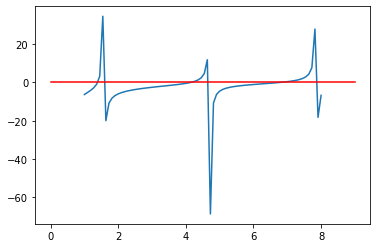

In [50]:


def f(x):
    return np.tan(x)-np.sqrt((8./x)**2-1)


# 这里给出一个4.5的初值，大家可以可以换个初值试试。
x = optimize.fsolve(f, 6)
print(x)
# 可以看到基本上f（x）一斤非常接近0了，他就认为已经解出这个方程了
print(f(x))
# 我们把这个方正的曲线画出来可以看倒有很多个解
xs = np.linspace(1, 10, 100)
plt.plot(xs, f(xs))
plt.plot(np.zeros(10), "r")

## 非线性方程组

我们也可以求解非线性方程组，和解一个方程原理是一样的。这里要注意点，可以看到我们定义的函数只有一个输入，
这个输入是一个array，数组里面有个元素，仿真就是有几个未知数。同时，这个方程返回的数也是一个数组，
返回的数组就有几个元素。

y - x^2 = 7 - 5x
4y - 8x = -21


In [51]:


def f2(x):
    return x[1]-x[0]**2-7+5*x[0], 4*x[1]-8*x[0]+21


x = optimize.fsolve(f2, (4, 5))
x


array([3.50000004, 1.75000009])

## quick quiz
接下面这个非线性方程组：
$$x^2+y^2=5$$
$$y=3x−5$$

In [ ]:
# quick quiz solution



## 练习 2
1. 在一个 3 维空间内，物质的密度分布为$\rho=x^2y^2z^2$,求一个圆锥体，底面为 xy 平面，圆心在原点，
半径为 1，高位 1 的圆锥体的质量